In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf # 회귀분석
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.tree import DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [34]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### 그래프 옵션 지정

In [35]:
import matplotlib.pyplot as plt

# 그래프에 한글 폰트 적용 (예: 맑은 고딕)
plt.rcParams["font.family"] = "NanumGothic"  # 혹은 "NanumGothic" 사용 가능

# 그래프에서 (-) 기호가 깨지지 않도록 설정
plt.rcParams["axes.unicode_minus"] = False


In [36]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## 탄소강(C) 데이터

In [37]:
# 데이터 불러오기
plate = pd.read_csv("/home/piai/빅데이터 종합실습/plate_c.csv")
plate.head()

,scale,steel_kind,hsb,fur_avg_temp,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,양품,C,적용,1127.5,297,CR(제어압연),934,8,2조
1,양품,C,적용,1136.0,235,CR(제어압연),911,8,2조
2,양품,C,적용,1130.0,240,CR(제어압연),935,10,2조
3,양품,C,적용,1130.0,287,CR(제어압연),935,10,2조
4,양품,C,적용,1135.5,286,CR(제어압연),915,10,2조


#### 범주형 설명변수 더미 변환

In [38]:
# 목표 변수 분리
y = plate['scale']

# 설명 변수들 중 scale을 제외한 나머지 열들만 선택
X = plate.drop('scale', axis=1)

# 나머지 설명 변수들에 대해 더미화 수행
X = pd.get_dummies(X, drop_first=True)

# 더미화 이후의 데이터프레임에 타겟 변수 추가
X['scale'] = y


#### 데이터 분리: 목표변수 vs. 설명변수

In [39]:
# 설명 변수와 목표 변수 분리
X_features = X.drop('scale', axis=1)
y_target = X['scale']


In [40]:
X.head()

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count,hsb_적용,work_group_2조,work_group_3조,work_group_4조,scale
0,1127.5,297,934,8,1,1,0,0,양품
1,1136.0,235,911,8,1,1,0,0,양품
2,1130.0,240,935,10,1,1,0,0,양품
3,1130.0,287,935,10,1,1,0,0,양품
4,1135.5,286,915,10,1,1,0,0,양품


## 3. Modeling

### 3-1. XGB(plate_c)

#### train, test split

In [41]:
# 설명 변수(X)와 목표 변수(y) 분리
X_features = X.drop('scale', axis=1)
y_target = X['scale']

# 데이터 분할 (train 70%, test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=1538)

# 분할된 데이터의 크기 확인
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (527, 8)
X_test shape: (226, 8)
y_train shape: (527,)
y_test shape: (226,)


In [42]:
# X_features의 첫 10행을 출력
display(X_features.head(10))

# X의 첫 10행을 출력하고 싶다면
display(X.head(10))

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count,hsb_적용,work_group_2조,work_group_3조,work_group_4조
0,1127.5,297,934,8,1,1,0,0
1,1136.0,235,911,8,1,1,0,0
2,1130.0,240,935,10,1,1,0,0
3,1130.0,287,935,10,1,1,0,0
4,1135.5,286,915,10,1,1,0,0
5,1137.0,284,923,10,1,1,0,0
6,1136.5,284,913,10,1,1,0,0
7,1133.0,251,977,8,1,1,0,0
8,1138.5,273,985,8,1,1,0,0
9,1139.5,285,955,10,1,1,0,0


,fur_avg_temp,fur_total_time,rolling_temp,descaling_count,hsb_적용,work_group_2조,work_group_3조,work_group_4조,scale
0,1127.5,297,934,8,1,1,0,0,양품
1,1136.0,235,911,8,1,1,0,0,양품
2,1130.0,240,935,10,1,1,0,0,양품
3,1130.0,287,935,10,1,1,0,0,양품
4,1135.5,286,915,10,1,1,0,0,양품
5,1137.0,284,923,10,1,1,0,0,양품
6,1136.5,284,913,10,1,1,0,0,양품
7,1133.0,251,977,8,1,1,0,0,양품
8,1138.5,273,985,8,1,1,0,0,양품
9,1139.5,285,955,10,1,1,0,0,양품


In [43]:
# 데이터프레임의 구조 확인
print("Data 구조:", X.columns)  # 'X'는 더미화된 전체 데이터셋
print()

# 훈련 데이터프레임의 변수 확인
print("변수 : ", X_train.columns)  # 'X_train'은 train_test_split 후 생성된 훈련 데이터


Data 구조: Index(['fur_avg_temp', 'fur_total_time', 'rolling_temp', 'descaling_count',
       'hsb_적용', 'work_group_2조', 'work_group_3조', 'work_group_4조', 'scale'],
      dtype='object')

변수 :  Index(['fur_avg_temp', 'fur_total_time', 'rolling_temp', 'descaling_count',
       'hsb_적용', 'work_group_2조', 'work_group_3조', 'work_group_4조'],
      dtype='object')


## XGB 모델 생성

### 기본 옵션 모델

오차행렬:
 [[ 82   4]
 [  2 138]] 

정확도: 0.9735
정밀도: 0.9718
재현율: 0.9857
F1    : 0.9787
AUC   : 0.9696


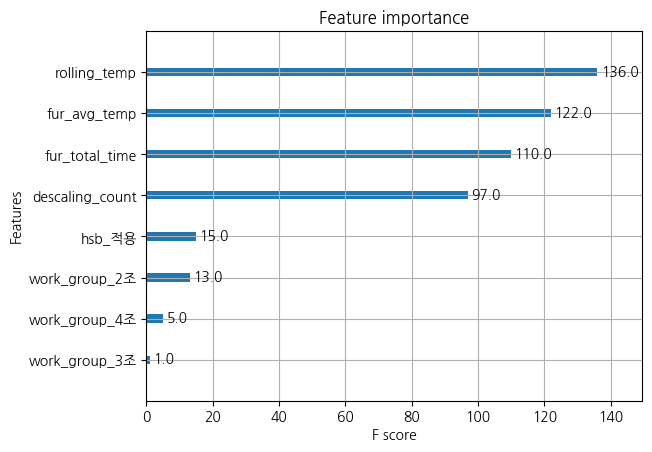

In [45]:
# 필요한 패키지 불러오기
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier, plot_importance  # plot_importance를 추가로 불러옴
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 타겟 변수 변환: '불량' -> 0, '양품' -> 1
y_train_encoded = y_train.map({'불량': 0, '양품': 1})
y_test_encoded = y_test.map({'불량': 0, '양품': 1})

# XGBoost 모델 초기화 및 학습
model = XGBClassifier(random_state=1538)
model.fit(X_train, y_train_encoded)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 분류 모델 평가 함수 정의
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

# 모델 평가 수행
eval_class_model(y_test_encoded, y_pred)

# 변수 중요도 시각화
plot_importance(model)
plt.show()



# 모델 생성 -XGBoost
-기본 옵션으로 모델 생성

In [20]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1538)

xgboost_uncust
# xgboost_uncust.get_params()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1538,
              reg_alpha=None, reg_lambda=None, ...)

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# XGBoost 모델 초기화
xgboost_uncust = XGBClassifier(random_state=1538)

# 모델 학습
xgboost_uncust.fit(X_train, y_train_encoded)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가: train
xgb_pred_train = xgboost_uncust.predict(X_train)

# 모델 평가
eval_class_model(y_train_encoded, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가: test
xgb_pred_test = xgboost_uncust.predict(X_test)

# 모델 평가
eval_class_model(y_test_encoded, xgb_pred_test)




 모델 생성 및 평가 : Train 

오차행렬:
 [[204   0]
 [  0 323]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[ 82   4]
 [  2 138]] 

정확도: 0.9735
정밀도: 0.9718
재현율: 0.9857
F1    : 0.9787
AUC   : 0.9696


## 정확도 기준 train 100%(과적합), test 97.3%로 train 모델은 과적합

## 모델 Parameter 입력 - XGBoost 
-다양한 hyper parameter 입력한 사용자 모델 개발 및 평가

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 사용자 모델 생성
xgboost_user = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1538)

# 모델 적합
xgboost_user.fit(X_train, y_train_encoded)

# 예측 및 모델 평가: Train
xgb_pred_train = xgboost_user.predict(X_train)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(y_train_encoded, xgb_pred_train)
print('\n', classification_report(y_train_encoded, xgb_pred_train))

# 예측 및 모델 평가: Test
xgb_pred_test = xgboost_user.predict(X_test)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(y_test_encoded, xgb_pred_test)
print('\n', classification_report(y_test_encoded, xgb_pred_test))



 사용자 모델 평가 : Train 

오차행렬:
 [[202   2]
 [  0 323]] 

정확도: 0.9962
정밀도: 0.9938
재현율: 1.0000
F1    : 0.9969
AUC   : 0.9951

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       204
           1       0.99      1.00      1.00       323

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527


 사용자 모델 평가 : Test 

오차행렬:
 [[ 83   3]
 [  2 138]] 

정확도: 0.9779
정밀도: 0.9787
재현율: 0.9857
F1    : 0.9822
AUC   : 0.9754

               precision    recall  f1-score   support

           0       0.98      0.97      0.97        86
           1       0.98      0.99      0.98       140

    accuracy                           0.98       226
   macro avg       0.98      0.98      0.98       226
weighted avg       0.98      0.98      0.98       226



# 모델 Parameter 입력-XGBoost
-조기 중지 옵션 사용 모델 개발 및 평가

In [27]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss
from xgboost import XGBClassifier

# 모델 성능 평가 데이터
eval_df = [(X_test, y_test_encoded)]

xgb_stop = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=1538)

xgb_stop.fit(X_train, y_train_encoded, 
            # 조기 중단 파라미터
             early_stopping_rounds=150, eval_metric="logloss", eval_set=eval_df, verbose=True)


[0]	validation_0-logloss:0.60777
[1]	validation_0-logloss:0.53714
[2]	validation_0-logloss:0.47810
[3]	validation_0-logloss:0.42815
[4]	validation_0-logloss:0.38550
[5]	validation_0-logloss:0.34928
[6]	validation_0-logloss:0.31752
[7]	validation_0-logloss:0.29023
[8]	validation_0-logloss:0.26613
[9]	validation_0-logloss:0.24504
[10]	validation_0-logloss:0.22645
[11]	validation_0-logloss:0.21002
[12]	validation_0-logloss:0.19515
[13]	validation_0-logloss:0.18245
[14]	validation_0-logloss:0.17081
[15]	validation_0-logloss:0.16027


/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-logloss:0.15102
[17]	validation_0-logloss:0.14222
[18]	validation_0-logloss:0.13484
[19]	validation_0-logloss:0.12807
[20]	validation_0-logloss:0.12183
[21]	validation_0-logloss:0.11650
[22]	validation_0-logloss:0.11252
[23]	validation_0-logloss:0.10786
[24]	validation_0-logloss:0.10396
[25]	validation_0-logloss:0.10048
[26]	validation_0-logloss:0.09702
[27]	validation_0-logloss:0.09422
[28]	validation_0-logloss:0.09136
[29]	validation_0-logloss:0.08905
[30]	validation_0-logloss:0.08701
[31]	validation_0-logloss:0.08486
[32]	validation_0-logloss:0.08316
[33]	validation_0-logloss:0.08216
[34]	validation_0-logloss:0.08078
[35]	validation_0-logloss:0.07985
[36]	validation_0-logloss:0.07877
[37]	validation_0-logloss:0.07830
[38]	validation_0-logloss:0.07717
[39]	validation_0-logloss:0.07616
[40]	validation_0-logloss:0.07520
[41]	validation_0-logloss:0.07481
[42]	validation_0-logloss:0.07423
[43]	validation_0-logloss:0.07396
[44]	validation_0-logloss:0.07300
[45]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1538, reg_alpha=0, reg_lambda=1, ...)

In [28]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)  

최적 횟수: 60
최적 성능(0-LogLoss): 0.06550143707741414


# 모델 Parameter 입력 - XGBoost
-조기 중지 옵션 사용 모델 개발 및 평가

In [30]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(X_test)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(y_test_encoded, xgb_pred_stop)
print('\n', classification_report(y_test_encoded, xgb_pred_stop))



 조기 중단 모델 평가 : Test 

오차행렬:
 [[ 83   3]
 [  2 138]] 

정확도: 0.9779
정밀도: 0.9787
재현율: 0.9857
F1    : 0.9822
AUC   : 0.9754

               precision    recall  f1-score   support

           0       0.98      0.97      0.97        86
           1       0.98      0.99      0.98       140

    accuracy                           0.98       226
   macro avg       0.98      0.98      0.98       226
weighted avg       0.98      0.98      0.98       226



## 조기 중단 모델의 정확도는 97.7%로 사용자 모델 정확도는 99.6%로 차이가 존재한다

# 결론 도출 - XGBoost
-설명변수의 중요도 확인: plot_importance

{'fur_avg_temp': 309.0, 'fur_total_time': 243.0, 'rolling_temp': 328.0, 'descaling_count': 223.0, 'hsb_적용': 44.0, 'work_group_2조': 22.0, 'work_group_3조': 6.0, 'work_group_4조': 18.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

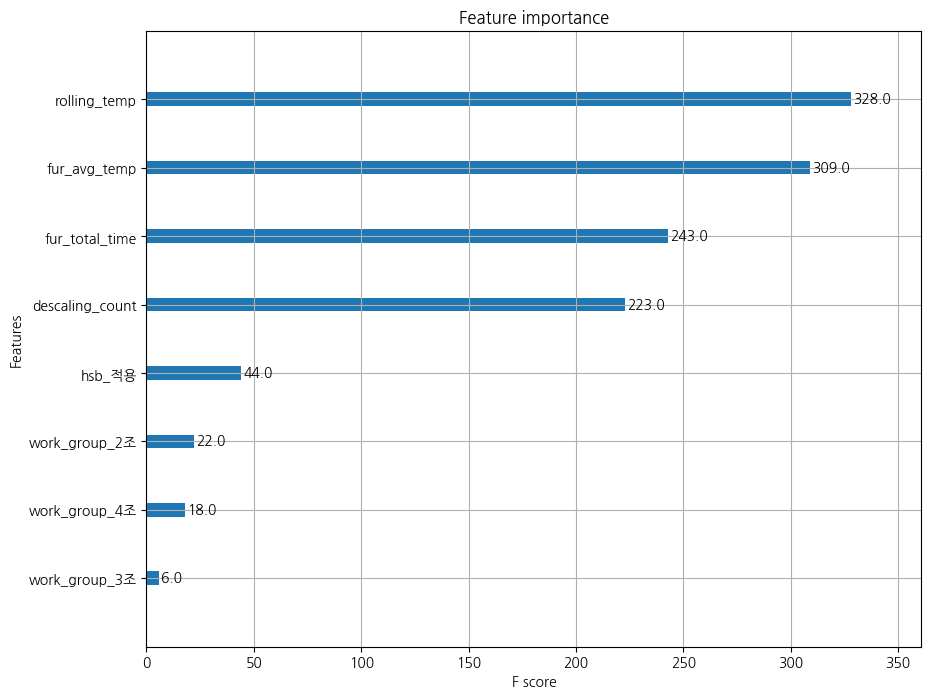

In [31]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

## 중요 설명변수 : rolling_temp, fur_avg_temp 순으로 중요함 

## 티타늄(Ti) 데이터

In [5]:
# 데이터 불러오기
plate = pd.read_csv("/home/piai/빅데이터 종합실습/plate_t.csv")
plate.head()

,scale,steel_kind,hsb,fur_avg_temp,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,양품,T,적용,1138.5,259,TMCP(온도제어),934,8,1조
1,양품,T,적용,1139.5,238,TMCP(온도제어),937,8,1조
2,양품,T,적용,1125.0,258,TMCP(온도제어),889,8,1조
3,양품,T,적용,1139.5,266,TMCP(온도제어),885,8,1조
4,양품,T,적용,1134.0,246,TMCP(온도제어),873,8,1조


#### 범주형 설명변수 더미 변환

In [6]:
# 목표 변수 분리
y = plate['scale']

# 설명 변수들 중 scale을 제외한 나머지 열들만 선택
X = plate.drop('scale', axis=1)

# 나머지 설명 변수들에 대해 더미화 수행
X = pd.get_dummies(X, drop_first=True)

# 더미화 이후의 데이터프레임에 타겟 변수 추가
X['scale'] = y


#### 데이터 분리: 목표변수 vs. 설명변수

In [7]:
# 설명 변수와 목표 변수 분리
X_features = X.drop('scale', axis=1)
y_target = X['scale']


In [8]:
X.head()

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count,hsb_적용,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,scale
0,1138.5,259,934,8,1,1,0,0,양품
1,1139.5,238,937,8,1,1,0,0,양품
2,1125.0,258,889,8,1,1,0,0,양품
3,1139.5,266,885,8,1,1,0,0,양품
4,1134.0,246,873,8,1,1,0,0,양품


## 3. Modeling

### 3-1. XGB(plate_t)

#### train, test split

In [9]:
# 설명 변수(X)와 목표 변수(y) 분리
X_features = X.drop('scale', axis=1)
y_target = X['scale']

# 데이터 분할 (train 70%, test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=1538)

# 분할된 데이터의 크기 확인
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (168, 8)
X_test shape: (73, 8)
y_train shape: (168,)
y_test shape: (73,)


In [10]:
# X_features의 첫 10행을 출력
display(X_features.head(10))

# X의 첫 10행을 출력하고 싶다면
display(X.head(10))

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count,hsb_적용,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조
0,1138.5,259,934,8,1,1,0,0
1,1139.5,238,937,8,1,1,0,0
2,1125.0,258,889,8,1,1,0,0
3,1139.5,266,885,8,1,1,0,0
4,1134.0,246,873,8,1,1,0,0
5,1135.5,255,874,8,1,1,0,0
6,1134.0,278,878,8,1,1,0,0
7,1135.0,272,870,8,1,1,0,0
8,1124.5,241,873,8,1,1,0,0
9,1129.5,290,881,7,1,1,0,0


,fur_avg_temp,fur_total_time,rolling_temp,descaling_count,hsb_적용,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,scale
0,1138.5,259,934,8,1,1,0,0,양품
1,1139.5,238,937,8,1,1,0,0,양품
2,1125.0,258,889,8,1,1,0,0,양품
3,1139.5,266,885,8,1,1,0,0,양품
4,1134.0,246,873,8,1,1,0,0,양품
5,1135.5,255,874,8,1,1,0,0,양품
6,1134.0,278,878,8,1,1,0,0,양품
7,1135.0,272,870,8,1,1,0,0,양품
8,1124.5,241,873,8,1,1,0,0,양품
9,1129.5,290,881,7,1,1,0,0,불량


In [11]:
# 데이터프레임의 구조 확인
print("Data 구조:", X.columns)  # 'X'는 더미화된 전체 데이터셋
print()

# 훈련 데이터프레임의 변수 확인
print("변수 : ", X_train.columns)  # 'X_train'은 train_test_split 후 생성된 훈련 데이터


Data 구조: Index(['fur_avg_temp', 'fur_total_time', 'rolling_temp', 'descaling_count',
       'hsb_적용', 'rolling_method_TMCP(온도제어)', 'work_group_2조', 'work_group_3조',
       'scale'],
      dtype='object')

변수 :  Index(['fur_avg_temp', 'fur_total_time', 'rolling_temp', 'descaling_count',
       'hsb_적용', 'rolling_method_TMCP(온도제어)', 'work_group_2조',
       'work_group_3조'],
      dtype='object')


## XGB 모델 생성

### 기본 옵션 모델


오차행렬:
 [[ 2  4]
 [ 0 67]] 

정확도: 0.9452
정밀도: 0.9437
재현율: 1.0000
F1    : 0.9710
AUC   : 0.6667


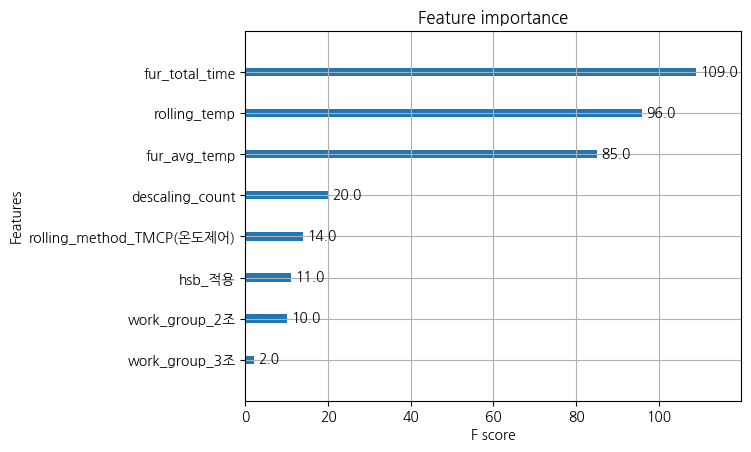

In [12]:
# 필요한 패키지 불러오기
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier, plot_importance  # plot_importance를 추가로 불러옴
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 타겟 변수 변환: '불량' -> 0, '양품' -> 1
y_train_encoded = y_train.map({'불량': 0, '양품': 1})
y_test_encoded = y_test.map({'불량': 0, '양품': 1})

# XGBoost 모델 초기화 및 학습
model = XGBClassifier(random_state=1538)
model.fit(X_train, y_train_encoded)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 분류 모델 평가 함수 정의
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

# 모델 평가 수행
eval_class_model(y_test_encoded, y_pred)

# 변수 중요도 시각화
plot_importance(model)
plt.show()


# 모델 생성 -XGBoost
-기본 옵션으로 모델 생성

In [13]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1538)

xgboost_uncust
# xgboost_uncust.get_params()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1538,
              reg_alpha=None, reg_lambda=None, ...)

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# XGBoost 모델 초기화
xgboost_uncust = XGBClassifier(random_state=1538)

# 모델 학습
xgboost_uncust.fit(X_train, y_train_encoded)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가: train
xgb_pred_train = xgboost_uncust.predict(X_train)

# 모델 평가
eval_class_model(y_train_encoded, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가: test
xgb_pred_test = xgboost_uncust.predict(X_test)

# 모델 평가
eval_class_model(y_test_encoded, xgb_pred_test)




 모델 생성 및 평가 : Train 

오차행렬:
 [[ 14   0]
 [  0 154]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[ 2  4]
 [ 0 67]] 

정확도: 0.9452
정밀도: 0.9437
재현율: 1.0000
F1    : 0.9710
AUC   : 0.6667


## 정확도 기준 train 100%(과적합), test 94.5%로 train 모델은 과적합


## 모델 Parameter 입력 - XGBoost 
-다양한 hyper parameter 입력한 사용자 모델 개발 및 평가

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 사용자 모델 생성
xgboost_user = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1538)

# 모델 적합
xgboost_user.fit(X_train, y_train_encoded)

# 예측 및 모델 평가: Train
xgb_pred_train = xgboost_user.predict(X_train)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(y_train_encoded, xgb_pred_train)
print('\n', classification_report(y_train_encoded, xgb_pred_train))

# 예측 및 모델 평가: Test
xgb_pred_test = xgboost_user.predict(X_test)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(y_test_encoded, xgb_pred_test)
print('\n', classification_report(y_test_encoded, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[ 12   2]
 [  0 154]] 

정확도: 0.9881
정밀도: 0.9872
재현율: 1.0000
F1    : 0.9935
AUC   : 0.9286

               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.99      1.00      0.99       154

    accuracy                           0.99       168
   macro avg       0.99      0.93      0.96       168
weighted avg       0.99      0.99      0.99       168


 사용자 모델 평가 : Test 

오차행렬:
 [[ 2  4]
 [ 0 67]] 

정확도: 0.9452
정밀도: 0.9437
재현율: 1.0000
F1    : 0.9710
AUC   : 0.6667

               precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.94      1.00      0.97        67

    accuracy                           0.95        73
   macro avg       0.97      0.67      0.74        73
weighted avg       0.95      0.95      0.93        73



# 모델 Parameter 입력-XGBoost
-조기 중지 옵션 사용 모델 개발 및 평가

In [16]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss
from xgboost import XGBClassifier

# 모델 성능 평가 데이터
eval_df = [(X_test, y_test_encoded)]

xgb_stop = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=1538)

xgb_stop.fit(X_train, y_train_encoded, 
            # 조기 중단 파라미터
             early_stopping_rounds=150, eval_metric="logloss", eval_set=eval_df, verbose=True)


[0]	validation_0-logloss:0.61662
[1]	validation_0-logloss:0.55448
[2]	validation_0-logloss:0.50290
[3]	validation_0-logloss:0.45961
[4]	validation_0-logloss:0.42305
[5]	validation_0-logloss:0.39350
[6]	validation_0-logloss:0.36670
[7]	validation_0-logloss:0.34362
[8]	validation_0-logloss:0.32373
[9]	validation_0-logloss:0.30626
[10]	validation_0-logloss:0.29049
[11]	validation_0-logloss:0.27724
[12]	validation_0-logloss:0.26521
[13]	validation_0-logloss:0.25544


/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.24649
[15]	validation_0-logloss:0.23904
[16]	validation_0-logloss:0.23203
[17]	validation_0-logloss:0.22646
[18]	validation_0-logloss:0.22077
[19]	validation_0-logloss:0.21808
[20]	validation_0-logloss:0.21627
[21]	validation_0-logloss:0.21429
[22]	validation_0-logloss:0.21286
[23]	validation_0-logloss:0.21157
[24]	validation_0-logloss:0.21175
[25]	validation_0-logloss:0.21205
[26]	validation_0-logloss:0.21152
[27]	validation_0-logloss:0.21241
[28]	validation_0-logloss:0.21215
[29]	validation_0-logloss:0.21211
[30]	validation_0-logloss:0.21227
[31]	validation_0-logloss:0.21395
[32]	validation_0-logloss:0.21393
[33]	validation_0-logloss:0.21511
[34]	validation_0-logloss:0.21573
[35]	validation_0-logloss:0.21704
[36]	validation_0-logloss:0.21789
[37]	validation_0-logloss:0.21928
[38]	validation_0-logloss:0.22097
[39]	validation_0-logloss:0.22195
[40]	validation_0-logloss:0.22170
[41]	validation_0-logloss:0.22335
[42]	validation_0-logloss:0.22392
[43]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1538, reg_alpha=0, reg_lambda=1, ...)

In [17]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score) 

최적 횟수: 26
최적 성능(0-LogLoss): 0.21152276316121832


# 모델 Parameter 입력 - XGBoost
-조기 중지 옵션 사용 모델 개발 및 평가

In [18]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(X_test)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(y_test_encoded, xgb_pred_stop)
print('\n', classification_report(y_test_encoded, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[ 2  4]
 [ 0 67]] 

정확도: 0.9452
정밀도: 0.9437
재현율: 1.0000
F1    : 0.9710
AUC   : 0.6667

               precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.94      1.00      0.97        67

    accuracy                           0.95        73
   macro avg       0.97      0.67      0.74        73
weighted avg       0.95      0.95      0.93        73



## 조기 중단 모델의 정확도는 94.5%로 사용자 모델 정확도는 94.5%로 유사하다

# 결론 도출 - XGBoost
-설명변수의 중요도 확인: plot_importance

{'fur_avg_temp': 156.0, 'fur_total_time': 239.0, 'rolling_temp': 176.0, 'descaling_count': 39.0, 'hsb_적용': 34.0, 'rolling_method_TMCP(온도제어)': 36.0, 'work_group_2조': 26.0, 'work_group_3조': 2.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

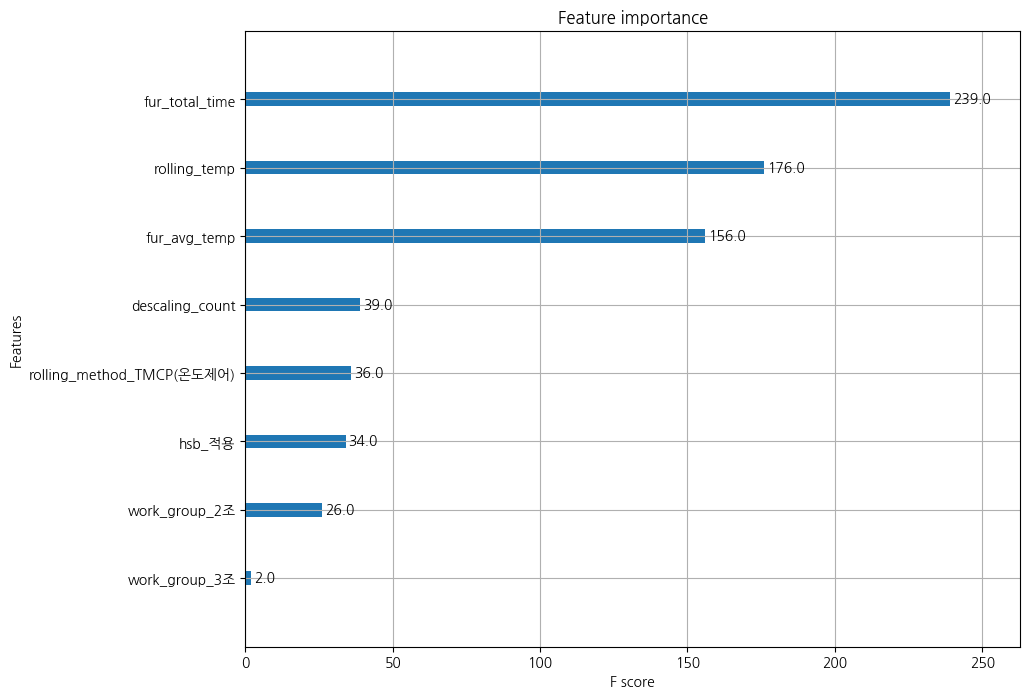

In [19]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

## 중요 설명변수 : fur_total_time, rolling_temp 순으로 중요함